# Open Data Cincinnati Safety Project

* Export data from Open Data Cincinnati Safety Project around Traffic Crashes
* Establish connection from API
* Build out Map using visualization tools for 

## Source of Information
https://data.cincinnati-oh.gov/safety/Traffic-Crash-Reports-CPD-/rvmt-pkmq


In [1]:
import requests
import pandas as pd

url = r'https://data.cincinnati-oh.gov/resource/rvmt-pkmq.json'
r = requests.get(url)

df = pd.read_json(r.content)

In [2]:
df.head(1)

,address_x,latitude_x,longitude_x,age,community_council_neighborhood,cpd_neighborhood,sna_neighborhood,crashdate,crashseverity,crashseverityid,...,mannerofcrash,roadconditionsprimary,roadcontour,roadsurface,unittype,typeofperson,weather,zip,roadclass,roadclassdesc
0,1XX W MITCHELL AV,39.161473,-84.508638,55.0,CLIFTON,CLIFTON,CLIFTON,2022-03-13T17:08:00.000,5 - PROPERTY DAMAGE ONLY,201905,...,2 - REAR-END,01 - DRY,1 - STRAIGHT LEVEL,"2 - BLACKTOP, BITUMINOUS, ASPHALT",01 - PASSENGER CAR,D - DRIVER,1 - CLEAR,45217.0,NaN,NaN


In [3]:
 %matplotlib inline

In [4]:
#Identify number of neighborhoods that are related to the content
print(df.cpd_neighborhood.nunique())
print(df.sna_neighborhood.nunique())
print(df.community_council_neighborhood.nunique())
pd.Series({c: df[c].unique() for c in df})


50
48
55


address_x                         [1XX W MITCHELL AV, 46XX KIRBY AV, 7XX WILLIAM...
latitude_x                        [39.161473, 39.161163, 39.173191, 39.12772, 39...
longitude_x                       [-84.508638, -84.507878, -84.547381, -84.48835...
age                               [55.0, nan, 37.0, 32.0, 25.0, 33.0, 41.0, 36.0...
community_council_neighborhood    [CLIFTON, NORTHSIDE, WALNUT HILLS, OTR, WEST P...
cpd_neighborhood                  [CLIFTON, NORTHSIDE, WALNUT HILLS, OVER-THE-RH...
sna_neighborhood                  [CLIFTON, NORTHSIDE, WALNUT HILLS, OVER-THE-RH...
crashdate                         [2022-03-13T17:08:00.000, 2022-03-13T00:30:00....
crashseverity                     [5 - PROPERTY DAMAGE ONLY, 3 - MINOR INJURY SU...
crashseverityid                            [201905, 201903, 201902, 201904, 201901]
datecrashreported                 [2022-03-13T19:17:39.000, 2022-03-13T19:15:00....
dayofweek                                       [SUN, FRI, SAT, WED, TUE, MO

<AxesSubplot:>

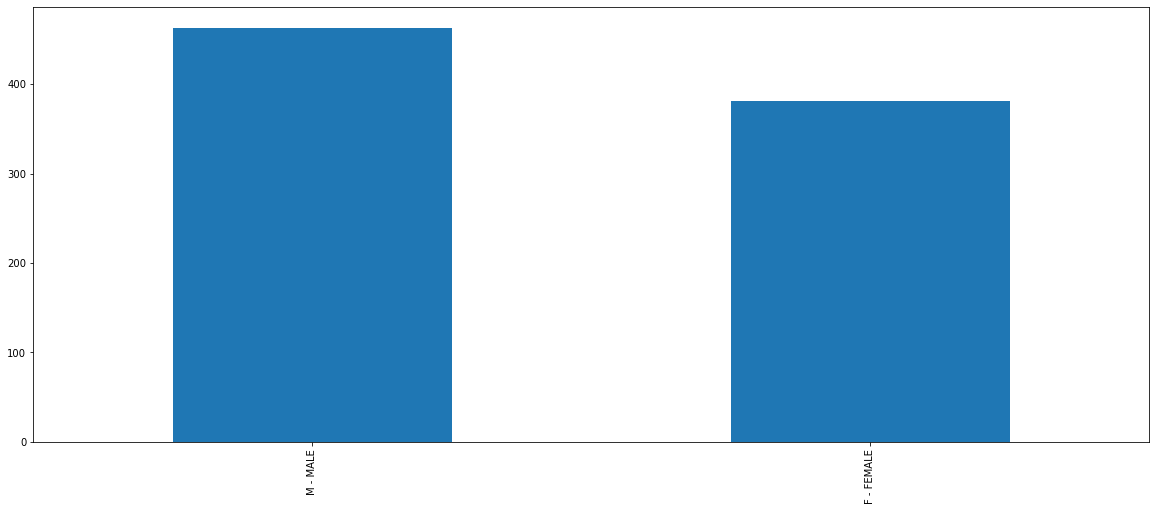

In [6]:
# df.plot(x="longitude_x", y="latitude_x", kind="scatter", c="age", colormap="YlOrRd")
# df.info()
import matplotlib.pyplot as plt

# Categorically set age groups into smaller subsets to plot
test = df[df['age'] > 0]
test['gender'].value_counts().plot(kind='bar',figsize=(20,8))

<AxesSubplot:>

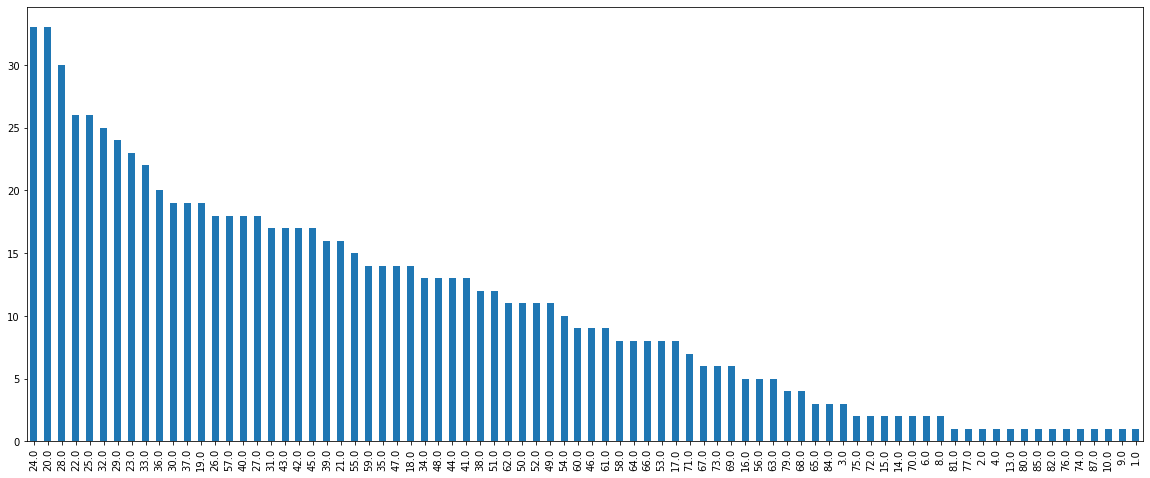

In [7]:
test['age'].value_counts().plot(kind='bar',figsize=(20,8))
